<a href="https://colab.research.google.com/github/Zorawar920/sas_application/blob/feat_CP8117P11-7/notebook/SAS_CP8117P11_21(RealworldTesting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import sys

#To play sound in notebook
import IPython.display as ipd  
from IPython.display import Audio
import numpy as np # linear algebra
import pandas as pd # data processing

In [234]:
from google.colab import drive
drive.mount('/content/drive/') 
print("Mounting of Drive is Successful !!")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Mounting of Drive is Successful !!


In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/drive/MyDrive/SAS/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/SAS/Emotion_Voice_Detection_Model.h5")
print("Loaded the model")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded the model


In [237]:
# data, sampling_rate = librosa.load('/content/sas_recording.m4a')


<class 'numpy.ndarray'> <class 'int'>
(81667,) 22050


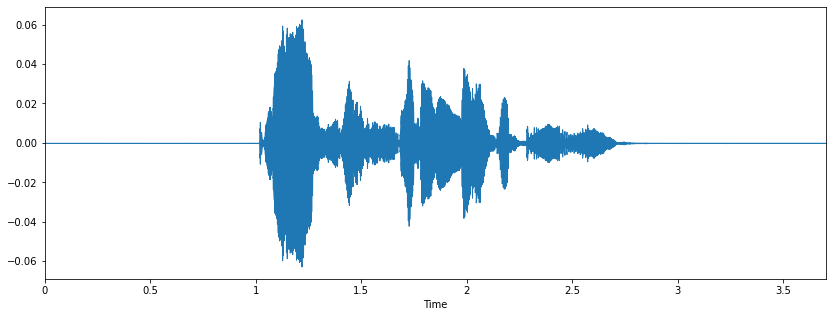

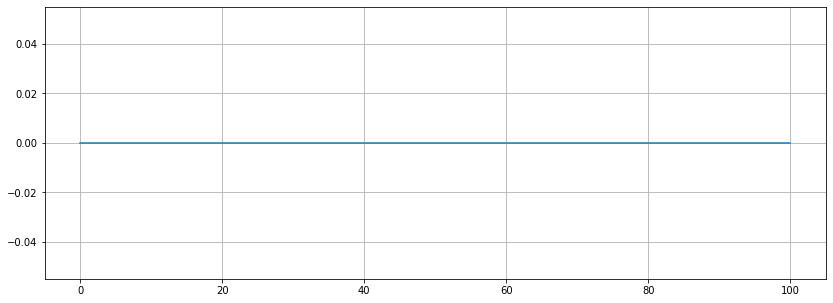

In [238]:
Audio1 = '/content/drive/MyDrive/Dataset/RAVDESS/Actor_02/03-01-04-02-02-01-02.wav'
x , sr = librosa.load(Audio1)
# print the types
print(type(x), type(sr))
print(x.shape, sr)

#plot the signal
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


#zooming in
n0 = 12000
n1 = 12101
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


#playing the audio
Audio(Audio1)


In [239]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive


In [240]:
livedf2= pd.DataFrame(data=livedf2)


In [241]:
livedf2 = livedf2.stack().to_frame().T


In [242]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-18.203562,-21.471832,-22.522213,-21.712259,-22.264282,-20.707907,-21.726439,-21.768646,-24.302736,-22.250633,-19.952745,-21.589886,-22.871395,-21.074196,-22.644075,-24.45673,-21.034203,-18.204836,-15.393932,-14.683822,-16.088182,-15.269257,-10.341142,-7.561025,-7.503775,-5.260729,-2.907981,-1.810234,-8.35399,-11.253943,-11.68832,-15.035958,-17.461966,-18.240295,-17.978508,-14.967607,-15.628134,-17.499977,-19.311691,-21.082069,...,-24.037477,-23.211409,-23.118687,-23.47167,-23.638603,-23.450207,-23.264921,-22.719471,-22.14872,-22.658384,-22.88862,-23.306034,-23.30761,-24.259129,-26.328209,-26.651802,-24.688915,-25.379475,-25.8253,-25.058117,-23.847221,-25.266714,-23.488476,-22.239729,-21.664198,-22.395565,-23.06472,-23.522367,-22.248775,-22.428013,-24.273821,-24.639936,-24.929155,-24.439188,-25.210173,-24.740648,-22.311916,-22.579805,-22.314659,-21.552433


In [243]:
twodim= np.expand_dims(livedf2, axis=2)


In [244]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)


1/1 [==============================] - 1s 615ms/step


In [245]:
livepreds

array([[9.2407373e-22, 0.0000000e+00, 3.6240221e-26, 1.3068814e-36,
        4.4726420e-28, 1.0000000e+00, 1.8020009e-30, 2.7687818e-27,
        3.6221893e-23, 1.6739410e-11]], dtype=float32)

In [246]:
livepreds1=livepreds.argmax(axis=1)


In [247]:
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[5]


In [248]:

# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()

# livepredictions = (lb.inverse_transform((liveabc)))
# livepredictions

feeling_list = ["Disgust","surprise","Calm","happy","sad","angry","fearful"]

prediction_emotion = feeling_list[int(liveabc)]
print("The detected emotion is ---> " + prediction_emotion)

The detected emotion is ---> angry
